### Pré-processamento dados estruturados: toy

In [ ]:
import numpy as np # array and vector manipulation
import pandas as pd # data manipulation

import seaborn as sns
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#from joblib import Parallel, delayed
#import multiprocessing as mp

In [ ]:
a = [1,2,3, 4]

def imprimir_par_impar(p):
    for i in range(len(a)):
        if a[i] % 2 == 0:
            print("Par: ", a[i])
        else:
            print("Impar: ", a[i])


In [ ]:
imprimir_par_impar(a)

Impar:  1
Par:  2
Impar:  3
Par:  4


In [ ]:
data_teste = pd.read_csv('toy.csv')
data_teste

,cpf,sexo,salario,estado,poupanca,altura,peso,total.emprestimo,financiamento
0,741132012,M,5124.00,MA,-1000.00,1.93,85.62,0.00,S
1,246313939,F,4772.45,SP,15012.90,1.84,99.12,NaN,S
2,431872706,F,5001.80,BA,0.00,1.66,104.39,0.00,N
3,127070574,F,5279.32,DF,0.00,1.73,72.57,0.00,S
4,620680270,M,5327.52,RS,8172.68,2.05,97.89,0.00,S
...,...,...,...,...,...,...,...,...,...
205,132343102,M,4610.80,SC,15116.02,1.62,103.20,461.08,N
206,792789534,M,5489.12,RN,14428.67,1.44,56.38,0.00,N
207,813971610,M,4525.37,PB,-1000.00,1.56,129.89,452.54,N
208,839747002,M,4297.15,MA,5542.76,2.10,106.36,0.00,N


In [ ]:
data_teste.head()

,cpf,sexo,salario,estado,poupanca,altura,peso,total.emprestimo,financiamento
0,741132012,M,5124.00,MA,-1000.00,1.93,85.62,0.0,S
1,246313939,F,4772.45,SP,15012.90,1.84,99.12,NaN,S
2,431872706,F,5001.80,BA,0.00,1.66,104.39,0.0,N
3,127070574,F,5279.32,DF,0.00,1.73,72.57,0.0,S
4,620680270,M,5327.52,RS,8172.68,2.05,97.89,0.0,S


In [ ]:
data_teste.tail()

,cpf,sexo,salario,estado,poupanca,altura,peso,total.emprestimo,financiamento
205,132343102,M,4610.80,SC,15116.02,1.62,103.20,461.08,N
206,792789534,M,5489.12,RN,14428.67,1.44,56.38,0.00,N
207,813971610,M,4525.37,PB,-1000.00,1.56,129.89,452.54,N
208,839747002,M,4297.15,MA,5542.76,2.10,106.36,0.00,N
209,844339630,F,4601.64,RS,0.00,2.08,106.92,460.16,N


In [ ]:
data_teste.shape

(210, 9)

In [ ]:
data_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cpf               210 non-null    int64  
 1   sexo              210 non-null    object 
 2   salario           205 non-null    float64
 3   estado            210 non-null    object 
 4   poupanca          205 non-null    float64
 5   altura            210 non-null    float64
 6   peso              210 non-null    float64
 7   total.emprestimo  205 non-null    float64
 8   financiamento     205 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 14.9+ KB


In [ ]:
data_teste.columns

Index(['cpf', 'sexo', 'salario', 'estado', 'poupanca', 'altura', 'peso',
       'total.emprestimo', 'financiamento'],
      dtype='object')

In [ ]:
data_teste.count()

,0
cpf,210
sexo,210
salario,205
estado,210
poupanca,205
altura,210
peso,210
total.emprestimo,205
financiamento,205


In [ ]:
data_teste.describe()

,cpf,salario,poupanca,altura,peso,total.emprestimo
count,2.100000e+02,205.000000,205.000000,210.000000,210.000000,205.000000
mean,5.313211e+08,5798.792683,3907.507220,2.240238,92.825905,154.011610
std,2.789570e+08,3923.162459,6243.935327,2.131078,19.849117,228.496524
min,1.959378e+07,4000.000000,-1000.000000,1.400000,55.550000,0.000000
25%,3.015684e+08,4581.440000,0.000000,1.620000,77.975000,0.000000
50%,5.711293e+08,5094.260000,0.000000,1.785000,95.180000,0.000000
75%,7.661590e+08,5489.120000,7306.130000,1.977500,106.230000,443.270000
max,9.999668e+08,25715.660000,19528.880000,11.980000,129.890000,600.000000


In [ ]:
data_teste

,cpf,sexo,salario,estado,poupanca,altura,peso,total.emprestimo,financiamento
0,741132012,M,5124.00,MA,-1000.00,1.93,85.62,0.00,S
1,246313939,F,4772.45,SP,15012.90,1.84,99.12,NaN,S
2,431872706,F,5001.80,BA,0.00,1.66,104.39,0.00,N
3,127070574,F,5279.32,DF,0.00,1.73,72.57,0.00,S
4,620680270,M,5327.52,RS,8172.68,2.05,97.89,0.00,S
...,...,...,...,...,...,...,...,...,...
205,132343102,M,4610.80,SC,15116.02,1.62,103.20,461.08,N
206,792789534,M,5489.12,RN,14428.67,1.44,56.38,0.00,N
207,813971610,M,4525.37,PB,-1000.00,1.56,129.89,452.54,N
208,839747002,M,4297.15,MA,5542.76,2.10,106.36,0.00,N


In [ ]:
data_teste.rename(columns={'total.emprestimo': 'emprestimo'})

,cpf,sexo,salario,estado,poupanca,altura,peso,emprestimo,financiamento
0,741132012,M,5124.00,MA,-1000.00,1.93,85.62,0.00,S
1,246313939,F,4772.45,SP,15012.90,1.84,99.12,NaN,S
2,431872706,F,5001.80,BA,0.00,1.66,104.39,0.00,N
3,127070574,F,5279.32,DF,0.00,1.73,72.57,0.00,S
4,620680270,M,5327.52,RS,8172.68,2.05,97.89,0.00,S
...,...,...,...,...,...,...,...,...,...
205,132343102,M,4610.80,SC,15116.02,1.62,103.20,461.08,N
206,792789534,M,5489.12,RN,14428.67,1.44,56.38,0.00,N
207,813971610,M,4525.37,PB,-1000.00,1.56,129.89,452.54,N
208,839747002,M,4297.15,MA,5542.76,2.10,106.36,0.00,N


In [ ]:
data_teste['estado'].unique()


array(['MA', 'SP', 'BA', 'DF', 'RS', 'SE', 'RN', 'AL', 'PA', 'AP', 'MG',
       'PE', 'PR', 'ES', 'AC', 'PI', 'RJ', 'RR', 'MS', 'TO', 'MT', 'CE',
       'GO', 'RO', 'PB', 'SC', 'AM'], dtype=object)

<Axes: ylabel='Frequency'>

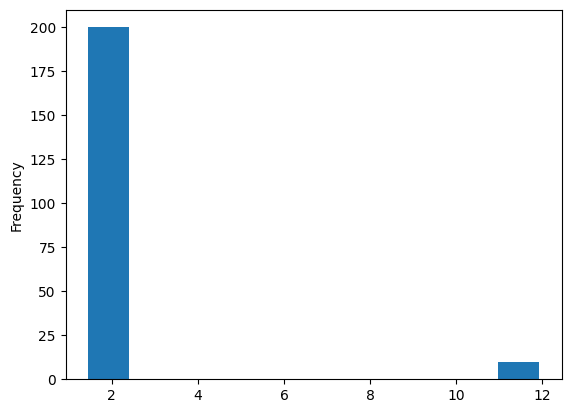

In [ ]:
data_teste['altura'].plot.hist(rwidth=0.9)

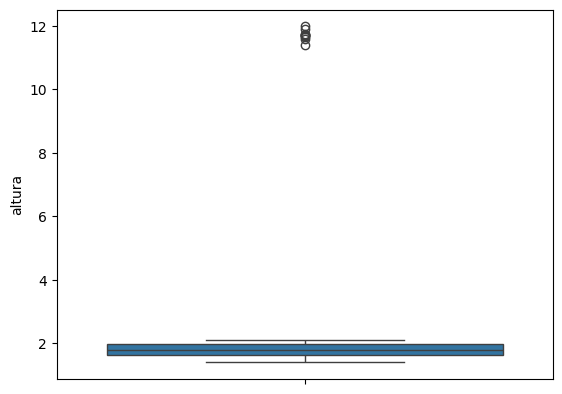

In [ ]:
ax = sns.boxplot(data=data_teste['altura'])

In [ ]:
outliers = boxplot_stats(data_teste["altura"]).pop(0)['fliers']

In [ ]:
np.where(data_teste["altura"].isin(outliers))

(array([ 19,  52,  67,  82,  99, 141, 144, 160, 168, 197]),)

In [ ]:
data_teste.shape

(210, 9)

In [ ]:
data_teste.drop(np.where(data_teste["altura"].isin(outliers))[0], inplace=True)

In [ ]:
data_teste.shape

(200, 9)

<Axes: ylabel='altura'>

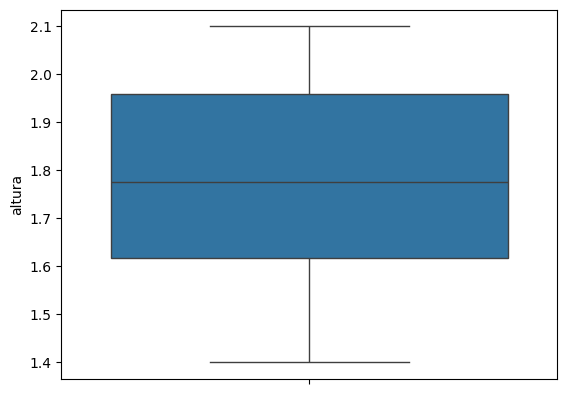

In [ ]:
sns.boxplot(data=data_teste['altura'])

<Axes: ylabel='Frequency'>

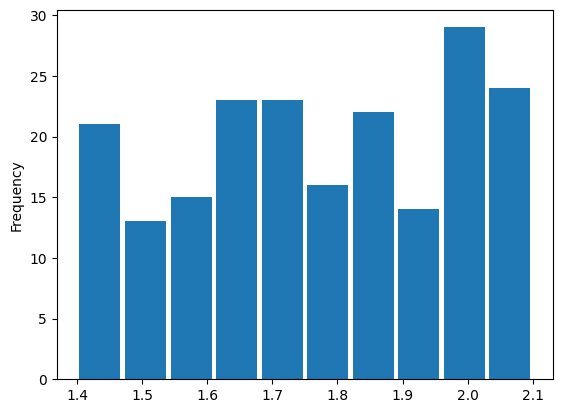

In [ ]:
data_teste['altura'].plot.hist(rwidth=0.9)

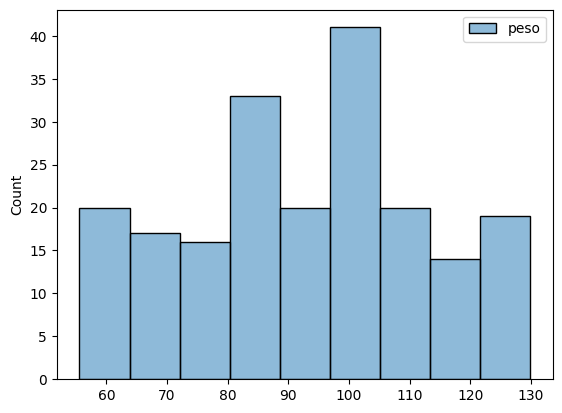

In [ ]:
ax = sns.histplot(data=data_teste.iloc[:,6:7])

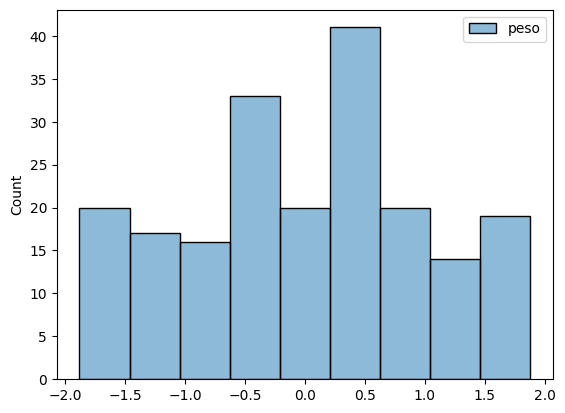

In [ ]:
scaler = StandardScaler()
norm_subset = pd.DataFrame(scaler.fit_transform(data_teste.iloc[:,6:7]), columns = ['peso'])
ax = sns.histplot(data=norm_subset)

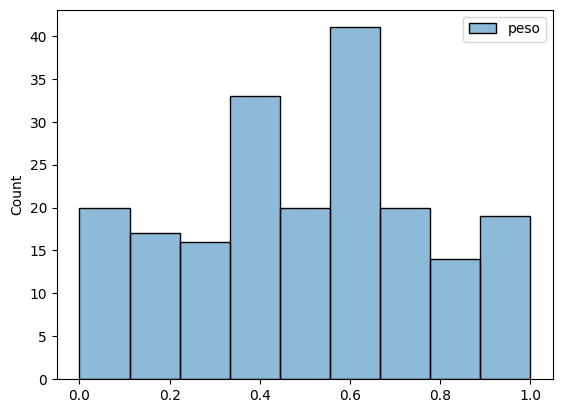

In [ ]:
scaler = MinMaxScaler()
norm_subset = pd.DataFrame(scaler.fit_transform(data_teste.iloc[:,6:7]), columns = ['peso'])
ax = sns.histplot(data=norm_subset)

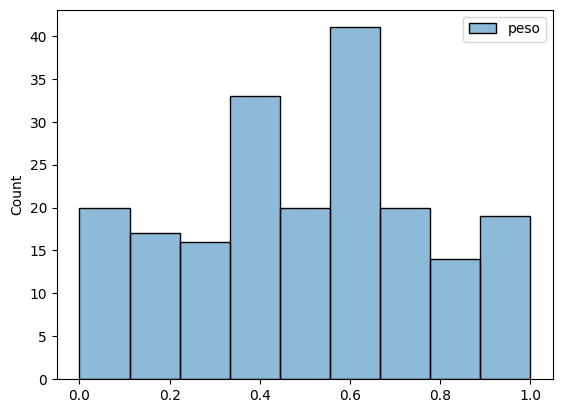

In [ ]:
data_teste['peso'] = (data_teste['peso'] - min(data_teste['peso']))/(max(data_teste['peso']) - min(data_teste['peso']))
ax = sns.histplot(data=data_teste.iloc[:,6:7])

<ipython-input-92-bbc55fa10a9c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=data_teste['peso'], orient="h", palette="Set2")


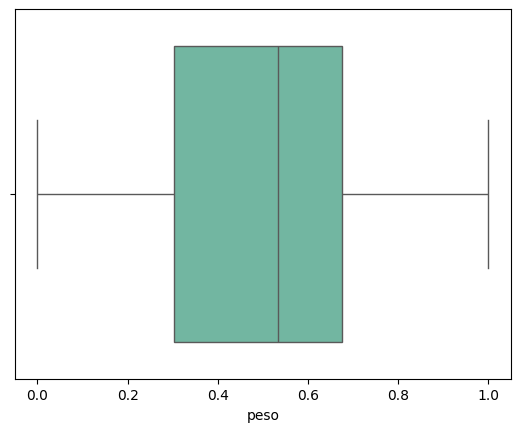

In [ ]:
ax = sns.boxplot(data=data_teste['peso'], orient="h", palette="Set2")

In [ ]:
result = Parallel(n_jobs=mp.cpu_count())(delayed(np.round)(data_teste[i].isna().sum()/len(data_teste[i]),6) for i in data_teste.columns)

perc_nan = pd.DataFrame(data = {'column': data_teste.columns, 'percent_nan': result})
perc_nan.sort_values(by=['percent_nan'], inplace=True, ascending=False)
perc_nan.drop(perc_nan[perc_nan['percent_nan'] == 0].index, inplace=True)
perc_nan

NameError: name 'Parallel' is not defined

### Pré-processamento dados estruturados

#### Full dataset: https://data.mendeley.com/datasets/9x62992sw6/2

In [ ]:
biodata = pd.read_csv('../../MATB16/biodiversity-br.csv')
biodata

In [ ]:
biodata.describe()

In [ ]:
ax = sns.boxplot(data=biodata, orient="h", palette="Set2")

In [ ]:
scaler = StandardScaler().fit(biodata)
norm_subset = pd.DataFrame(scaler.transform(biodata), columns = biodata.columns)
ax = sns.boxplot(data=norm_subset, orient="h", palette="Set2")

In [ ]:
ax = sns.boxplot(data=biodata['wind'], orient="h", palette="Set2")

In [ ]:
boxplot_stats(biodata["wind"]).pop(0)['fliers']

In [ ]:
remove_out = np.where(np.in1d(biodata["wind"],
                              boxplot_stats(biodata["wind"]).pop(0)['fliers']))
remove_out

In [ ]:
biodata.iloc[821, :]

In [ ]:
biodata["wind"].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title("Attribute: Wind")

In [ ]:
biodata.drop(index=remove_out[0], inplace = True)
biodata

In [ ]:
biodata["wind"].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title("Attribute: Wind")

In [ ]:
biodata.corr()

In [ ]:
corr = biodata.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Iris

In [ ]:
# pergunta em sala sobre encoders...
# (sugestão testar outras funções de encoders)
iris = pd.read_csv('../../MATB16/iris.csv')
iris

label_ids = iris['Species']

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(label_ids)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

onehot_encoded

In [ ]:
# Usando o pandas
pd.get_dummies(pd.Series(list(iris['Species'])))

#combinando dataframes

In [ ]:
pd.concat([iris, pd.get_dummies(pd.Series(list(iris['Species'])))], axis=1)

In [ ]:
iris.to_csv('/tmp/teste.csv')